
<div style="background-color:#4189E1; height:120px; border-radius: 15px">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
    <h1 style="padding-left: 15px; padding-top: 15px; color:white"><i class="fa fa-book"></i> Reading Raw data</h1> 
    <p style="padding-left: 15px; color:white">Read raw data and for some annotation and marking on plotted data.</p>
</div>


In [ ]:
# Read data EDF
import matplotlib
import pathlib
import mne
import mne_bids

Ensure Matplotlib uses the `Qt5Agg` backend, which is the best choice for MNE-Python's interactive plotting functions.

In [174]:
matplotlib.use('Qt5Agg')


<div style="background-color:#87CEFA; height:60px; border-radius: 10px">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-upload"></i> Load some raw data!</h2>
      
</div>

In [ ]:
participants_name = 'Sub1-task2-final'
# fname = 'E:/Uni/Arshad\T3/BAGH IRANI/f-askari/New Bagh/task1/'+participants_name+'.edf'
edf = mne.io.read_raw_edf('E:/Uni/Arshad\T3/BAGH IRANI/f-askari/New Bagh/task2/'+participants_name+'.edf')
edf


<div style="background-color:#87CEFA; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-paint-brush"></i> Let's visualize the raw data!</h2>
</div>

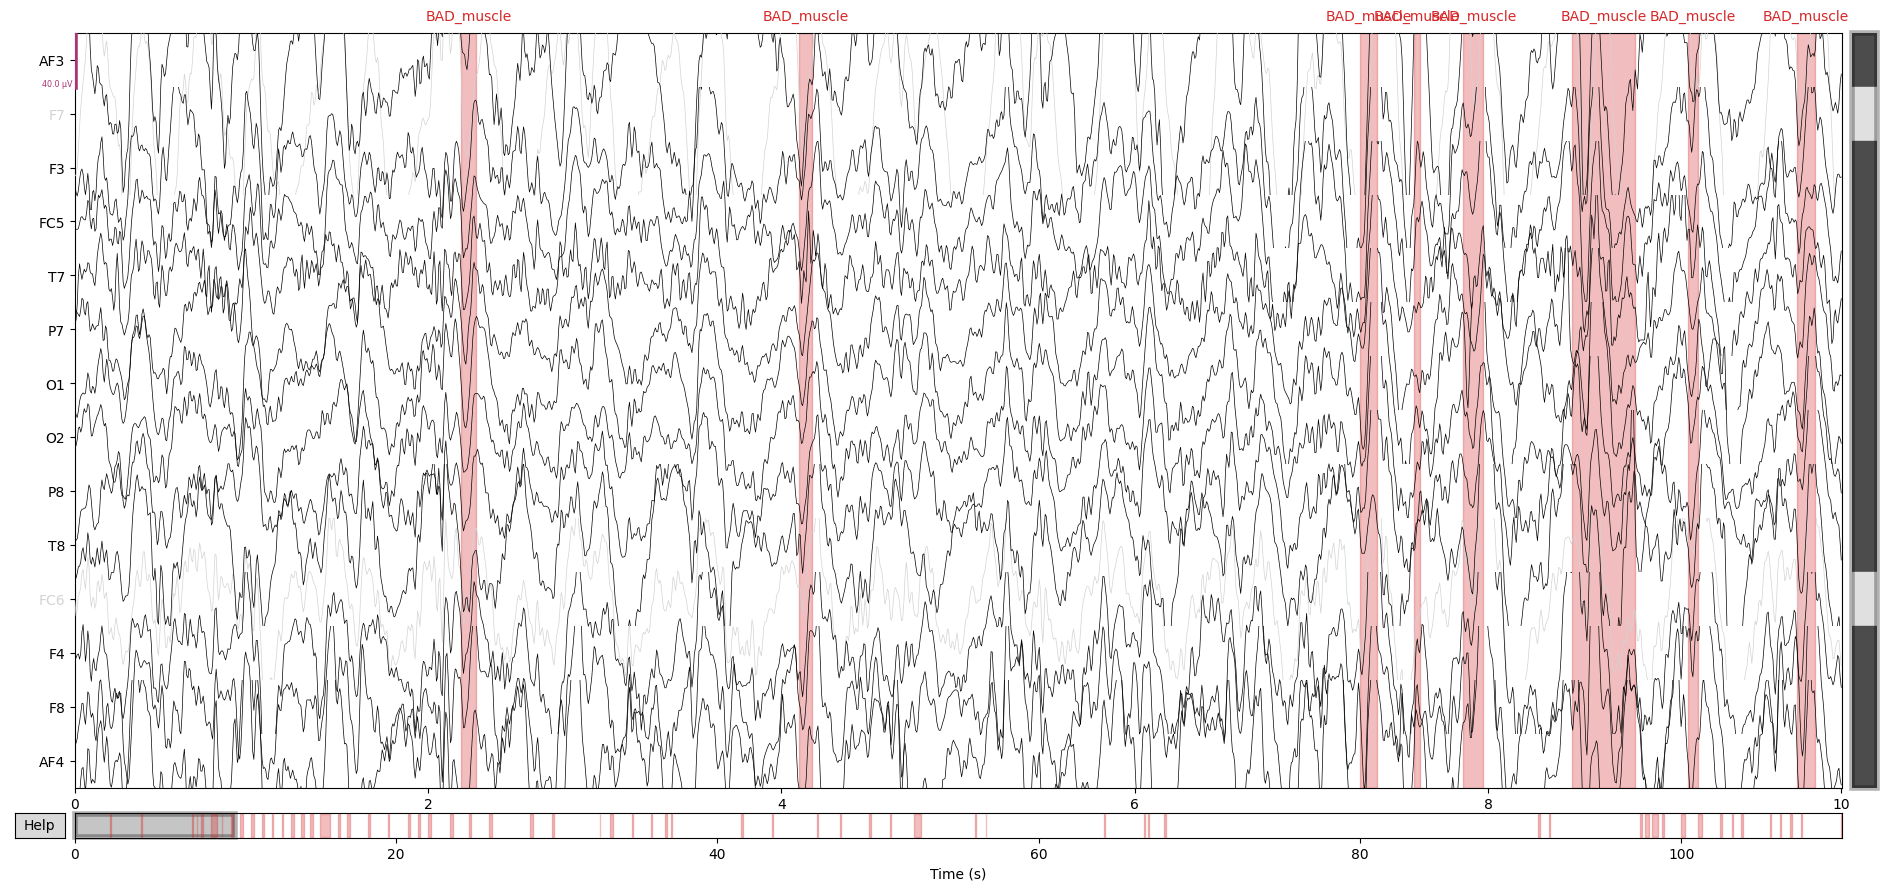

In [287]:
edf.plot()


<div style="background-color:#87CEFA; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-info-circle"></i> Gathering some info from datas</h2>
</div>

In [288]:
# edf.info?
meas_date = edf.info['meas_date']
sfreq = edf.info['sfreq']
events = edf.info['events']
print('the sfreq is: ' + str(sfreq))
print('the meas_date is: ' + str(meas_date))
print('the events is: ' + str(events))
edf.ch_names[:14]

the sfreq is: 300.0
the meas_date is: 2021-02-08 13:28:42+00:00
the events is: []


['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [290]:
correct_channels = {'AF3-LE':'AF3',
                    'F7-LE':'F7',
                    'F3-LE':'F3',
                    'FC5-LE':'FC5',
                    'T3-LE':'T7',
                    'T5-LE':'P7',
                    'O1-LE':'O1',
                    'O2-LE':'O2',
                    'T6-LE':'P8',
                    'T4-LE':'T8',
                    'FC6-LE':'FC6',
                    'F4-LE':'F4',
                    'F8-LE':'F8',
                    'AF4-LE':'AF4'}
edf. rename_channels(correct_channels, allow_duplicates=False, verbose=None)


edf.ch_names[:14]

ValueError: Invalid channel name(s) {'F8-LE', 'O1-LE', 'T3-LE', 'O2-LE', 'FC5-LE', 'T6-LE', 'AF3-LE', 'FC6-LE', 'F4-LE', 'F7-LE', 'T5-LE', 'T4-LE', 'AF4-LE', 'F3-LE'} are not present in info

<div style="background-color:#87CEFA; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-paint-brush"></i> Visualize the sensor locations</h2>
</div>

In [ ]:
edf.set_montage('easycap-M1', on_missing='ignore')

edf.plot_sensors(show_names=True)


<div style="background-color:#87CEFA; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-cube"></i> Plot 3D sensor locations</h2>
    
</div>

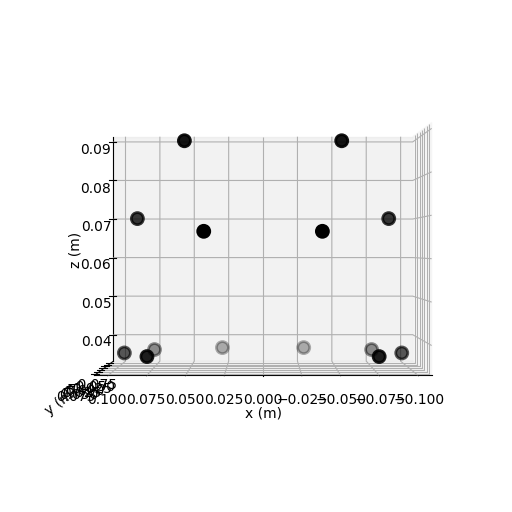

In [291]:
edf.plot_sensors(kind='3d', ch_type='eeg')

<div style="background-color:#FF5050; height:120px; border-radius: 15px">
    <h1 style="padding-left: 15px; padding-top: 40px;color:white"><i class="fa fa-filter"></i> Filter and cleaning the data</h1>   
</div>

<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top: 15px;"><i class="fa fa-crop"></i> Filter or cropp data</h2>
    
</div>

In [292]:
edf.load_data()
edf_filtered = edf.filter(l_freq=0.1, h_freq=40)

<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-trash"></i> Remove bad muscles from data</h2>      
</div>

In [293]:
import matplotlib.pyplot as plt
import numpy as np
from mne.datasets.brainstorm import bst_auditory
from mne.preprocessing import annotate_muscle_zscore



edf.resample(300, npad="auto")

<RawEDF | Sub1-task2-final.edf, 14 x 33001 (110.0 s), ~3.5 MB, data loaded>

 <div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-paint-brush"></i> Notch filter the data</h2>      
</div>

In [294]:
edf.notch_filter([60, 120])

<RawEDF | Sub1-task2-final.edf, 14 x 33001 (110.0 s), ~3.5 MB, data loaded>

In [295]:
# The threshold is data dependent, check the optimal threshold by plotting
# ``scores_muscle``.
threshold_muscle = 5  # z-score
# Choose one channel type, if there are axial gradiometers and magnetometers,
# select magnetometers as they are more sensitive to muscle activity.
annot_muscle, scores_muscle = annotate_muscle_zscore(
    edf, ch_type="eeg", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-print"></i>Plot muscle z-scores across recording</h2>      
</div>

In [296]:
fig, ax = plt.subplots()
ax.plot(edf.times, scores_muscle)
ax.axhline(y=threshold_muscle, color='r')
ax.set(xlabel='time, (s)', ylabel='zscore', title='Muscle activity')

[Text(0.5, 0, 'time, (s)'),
 Text(0, 0.5, 'zscore'),
 Text(0.5, 1.0, 'Muscle activity')]

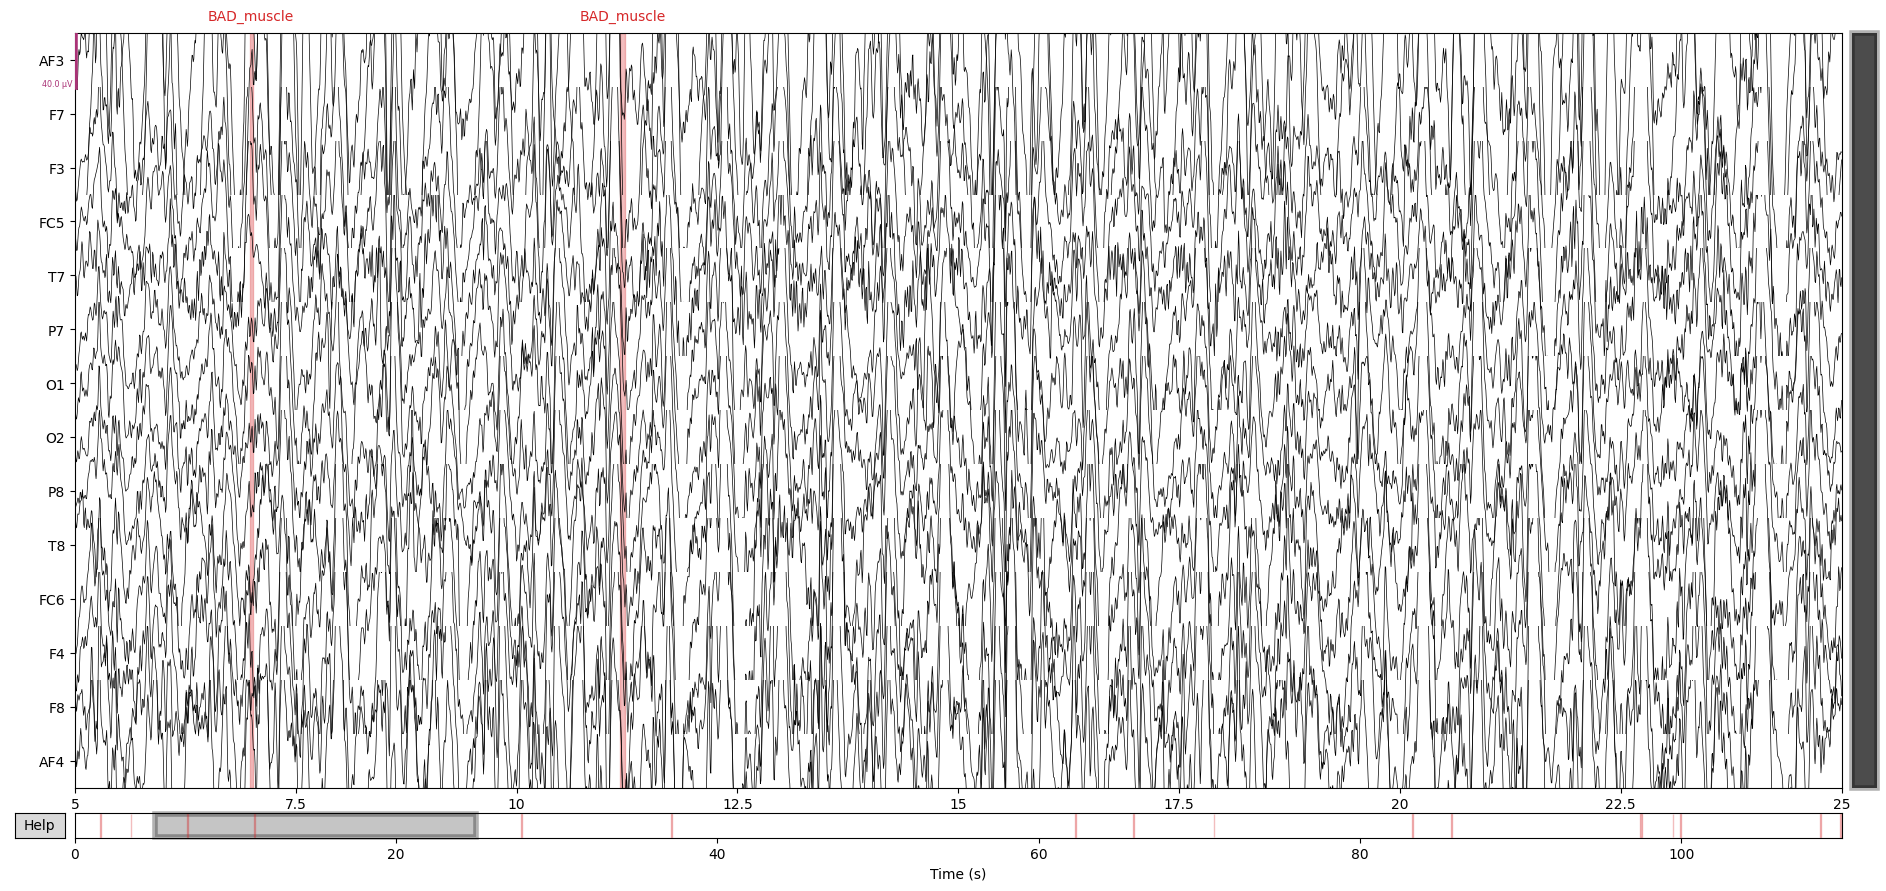

In [297]:
order = np.arange(0, 14)
edf.set_annotations(annot_muscle)
edf.plot(start=5, duration=20, order=order)


 <div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-sign-out"></i> Exclude bad components!</h2>      
</div>

In [298]:
matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [299]:
edf.load_data()
ica = mne.preprocessing.ICA(n_components=12, random_state=0)
ica.fit(edf.copy().filter(8,35))

<ICA | raw data decomposition, method: fastica (fit in 28 iterations on 32737 samples), 12 ICA components (14 PCA components available), channel types: eeg, no sources marked for exclusion>

In [300]:
ica.plot_components(outlines="skirt")

[<MNEFigure size 975x731 with 12 Axes>]

In [301]:
ica.exclude = [2,3,8,5,9]
ica.plot_properties(edf, picks=ica.exclude)


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-check"></i> Apply ica</h2>      
</div>

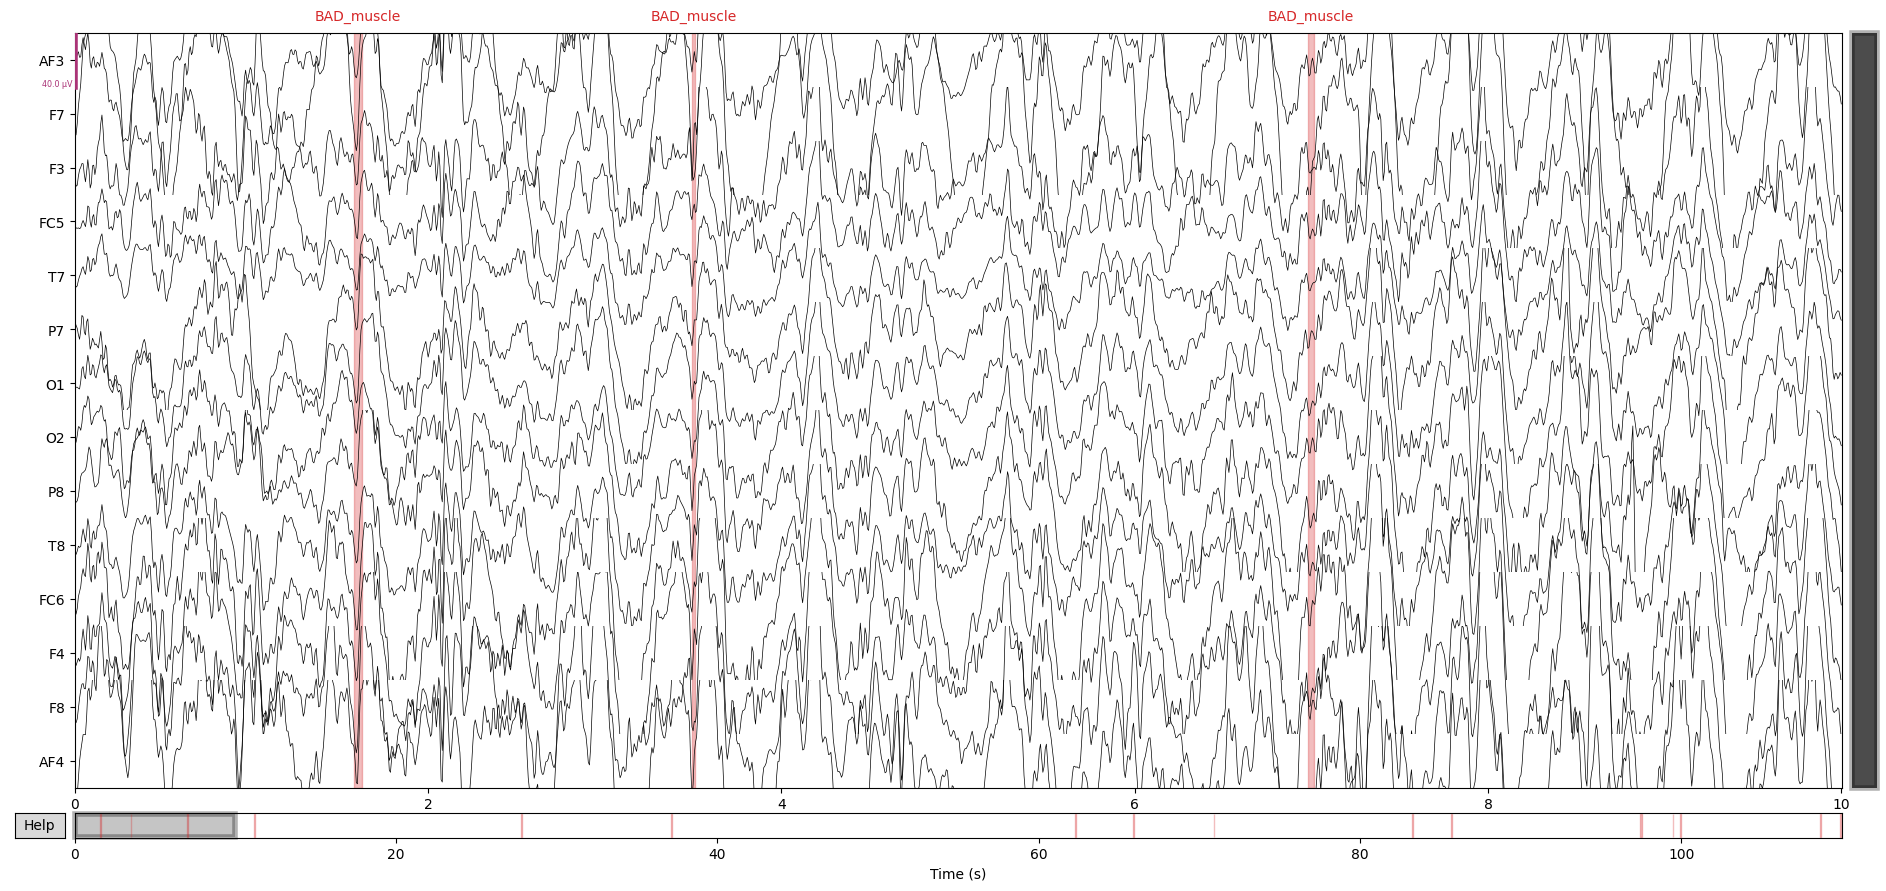

In [302]:
ica.apply(edf.copy(), exclude=ica.exclude).plot()


<div style="background-color:#FF9999; height:100px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-info-circle"></i> Review data after cleaning</h2>
    <p style="padding-left: 35px;">data informations which placed in table</p>
</div>


In [303]:
edf

<RawEDF | Sub1-task2-final.edf, 14 x 33001 (110.0 s), ~3.5 MB, data loaded>


<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-save"></i> Plot sensor denoising using oversampled temporal projection</h2>      
</div>

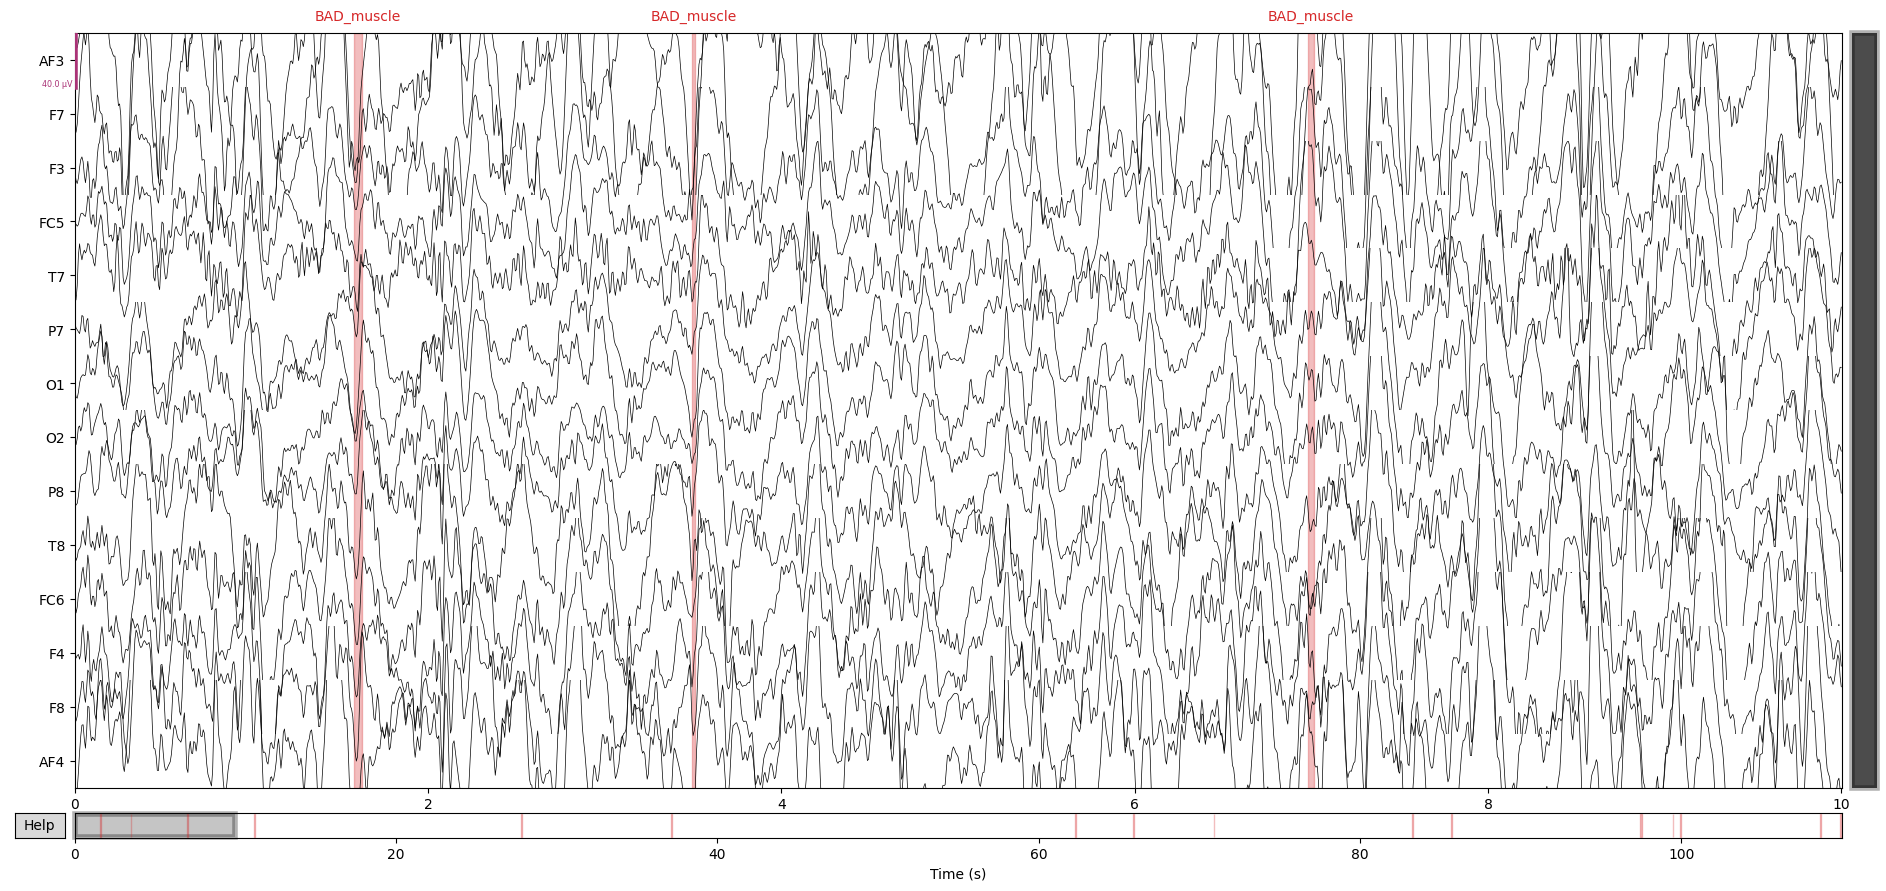

In [304]:
from mne import find_events, fit_dipole
from mne.datasets.brainstorm import bst_phantom_elekta
dipole_number = 1
edf.load_data()
order = list(range(0, 14))
edf.copy().filter(0., 40.).plot(order=order, n_channels=14)

In [305]:
edf_clean = mne.preprocessing.oversampled_temporal_projection(edf)
edf_clean.filter(0., 40.)
edf_clean.plot(order=order, n_channels=14)
edf_clean

<RawEDF | Sub1-task2-final.edf, 14 x 33001 (110.0 s), ~3.5 MB, data loaded>


<div style="background-color:#FF9999; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-save"></i> Save Data to fif format</h2>      
</div>

In [306]:
saved_address = 'C:/Users/farsh/Garden/out_data/'+participants_name+'.fif'
edf_filtered.save(saved_address, 
                              overwrite=True)

C:\Users\farsh\AppData\Local\Temp\ipykernel_15340\214090208.py:3: RuntimeWarning: This filename (C:\Users\farsh\Garden\out_data\Sub1-task2-final.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  overwrite=True)



<div style="background-color:#7345d1; height:120px; border-radius: 15px">
    <h1 style="padding-left: 15px; padding-top: 40px;color:white"><i class="fa fa-first-order"></i> Start BIDS</h1>   
</div>



<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <h2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-file"></i> reading fif raw data format</h2>      
</div>

In [307]:

raw = mne.io.read_raw('C:/Users/farsh/Garden/out_data/'+participants_name+'.fif')



C:\Users\farsh\AppData\Local\Temp\ipykernel_15340\1565236508.py:1: RuntimeWarning: This filename (C:/Users/farsh/Garden/out_data/Sub1-task2-final.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw('C:/Users/farsh/Garden/out_data/'+participants_name+'.fif')



<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <p style="padding-left: 15px; padding-top:15px"><i class="fa fa-ravelry"></i> We need to specify the power line frequency.</p>      
</div>

In [308]:
raw.info['line_freq'] = 60


<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <p style="padding-left: 15px; padding-top:15px"><i class="fa fa-ravelry"></i> Now, actually write the data.</p>      
</div>

In [309]:
out_path = pathlib.Path('out_data/sample_BIDS')

bids_path = mne_bids.BIDSPath(subject='01',
                              session='02',
                              task='audiovisual',
                              run='01',
                              root=out_path)

mne_bids.write_raw_bids(raw, bids_path=bids_path,overwrite=True)

C:\Users\farsh\AppData\Local\Temp\ipykernel_15340\1793018796.py:9: RuntimeWarning: This filename (C:/Users/farsh/Garden/out_data/Sub1-task2-final.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_bids.write_raw_bids(raw, bids_path=bids_path,overwrite=True)
C:\Users\farsh\AppData\Local\Temp\ipykernel_15340\1793018796.py:9: RuntimeWarning: Converting data files to BrainVision format
  mne_bids.write_raw_bids(raw, bids_path=bids_path,overwrite=True)


BIDSPath(
root: out_data/sample_BIDS
datatype: eeg
basename: sub-01_ses-02_task-audiovisual_run-01_eeg.vhdr)



<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-download"></i> reading BIDS</H2>      
</div>

In [310]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne_bids
import mne

matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [311]:
%matplotlib qt

In [312]:
bids_root = pathlib.Path('out_data/sample_BIDS')

bids_path = mne_bids.BIDSPath(subject='01',
                              session='02',
                              task='audiovisual',
                              run='01',
                              datatype='eeg',
                              root=bids_root)

raw = mne_bids.read_raw_bids(bids_path)
raw.load_data()
raw.filter(l_freq=0.1, h_freq=40)

tmin = -0.200
tmax = 0.500
baseline = (None, 0)
print(bids_path)

out_data/sample_BIDS/sub-01/ses-02/eeg/sub-01_ses-02_task-audiovisual_run-01_eeg.vhdr


In [313]:
print(raw.annotations)
print(set(raw.annotations.duration))
print(set(raw.annotations.description))
print(raw.annotations.onset[0])

<Annotations | 16 segments: BAD_muscle (16)>
{0.04333305358886719, 0.016666412353515625, 0.07999801635742188, 0.03333473205566406, 0.05000114440917969, 0.0966644287109375, 0.0433349609375, 0.0500030517578125, 0.05333709716796875, 0.046661376953125, 0.03333282470703125, 0.14333343505859375, 0.0366668701171875, 0.013336181640625, 0.09333038330078125}
{'BAD_muscle'}
1.58




<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-plus"></i> Add Events</H2>      
</div>

In [314]:
events, event_id = mne.events_from_annotations(raw, regexp = None)

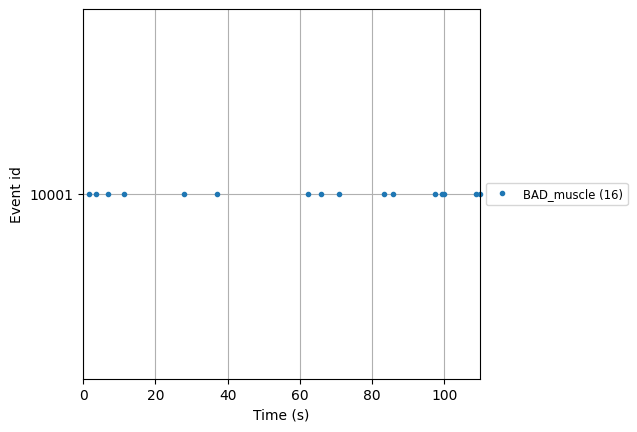

In [315]:
mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'])


<div style="background-color:#7375d1; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-map"></i> Create epochs</H2>      
</div>

In [208]:

baseline = (None, None)
# mne.Epochs?
epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_id,

                    baseline=baseline,
                    preload=True)
epochs

<Epochs |  0 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0.5 sec, ~27 kB, data loaded,
 'BAD_muscle': 0>

C:\Users\farsh\AppData\Local\Temp\ipykernel_15340\1904003814.py:2: RuntimeWarning: Saving epochs with no data
  overwrite=True)


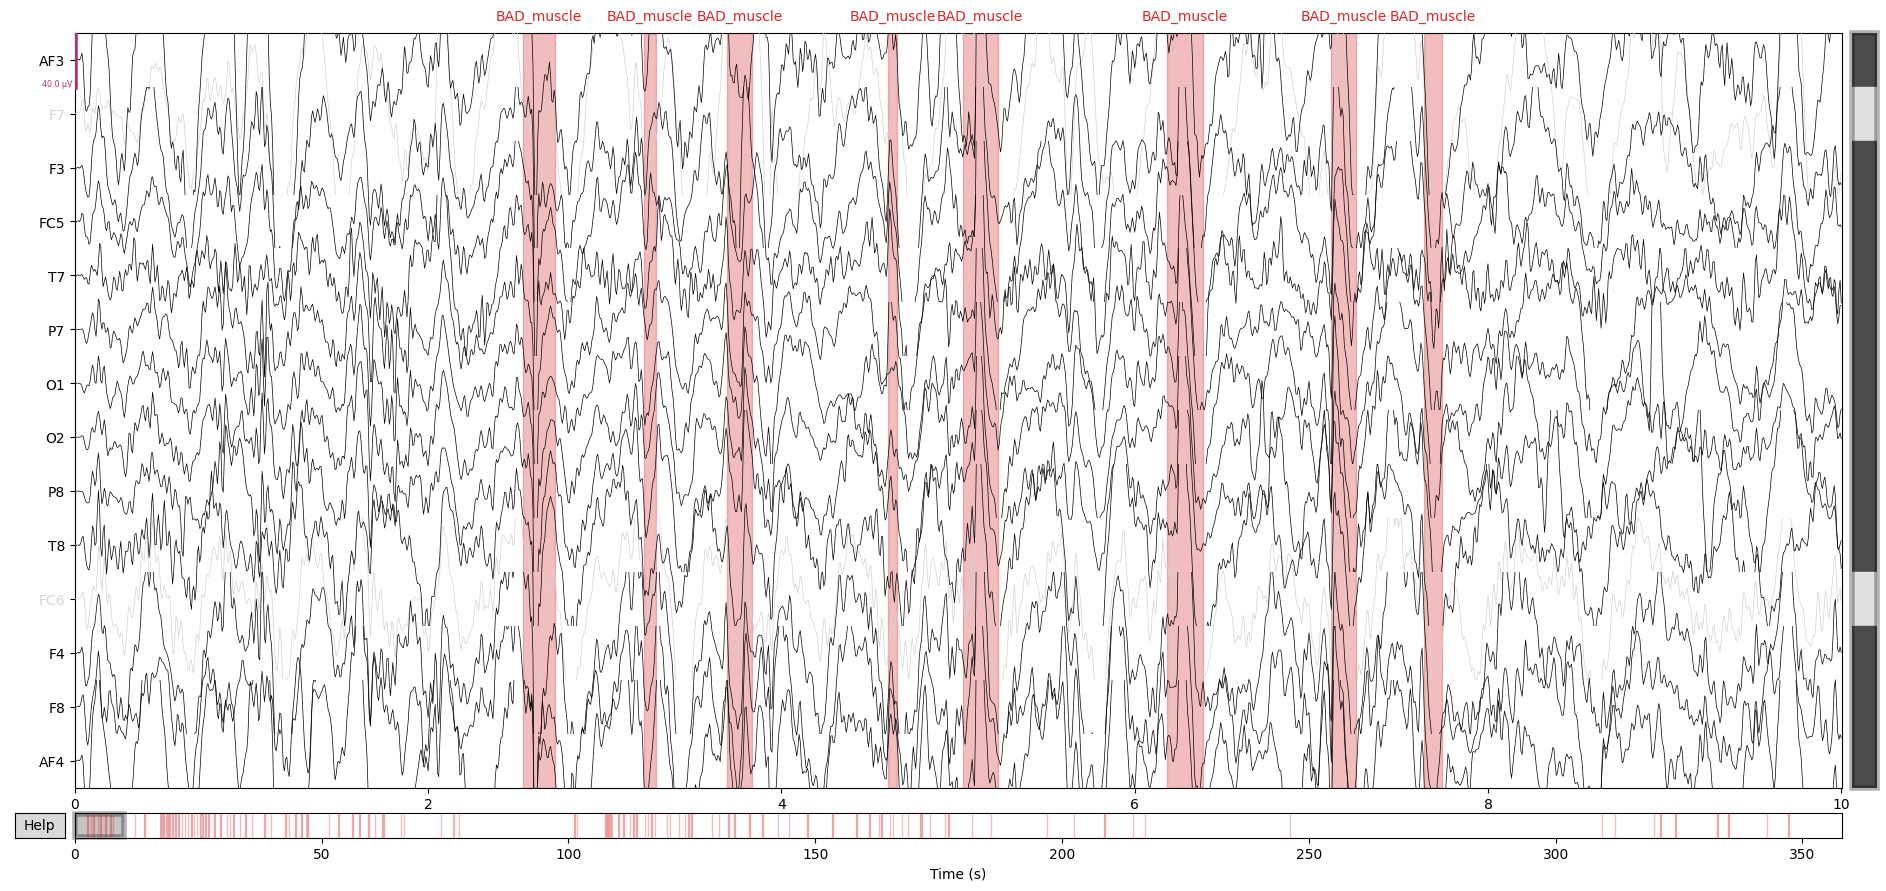

In [209]:
epochs.save(pathlib.Path('out_data') / 'epochs_epo.fif', 
            overwrite=True)
raw.plot()

In [215]:
# epochs.plot?


<div style="background-color:#00CC66; height:120px; border-radius: 15px">
    <h1 style="padding-left: 15px; padding-top: 40px;color:white"><i class="fa fa-flask"></i> Statistic operations</h1>   
</div>



<div style="background-color:#80CC66; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-file"></i> Import libraries</H2>  
</div>

In [316]:
from functools import partial


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa, analysis:ignore

import mne
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,
                       permutation_t_test, permutation_cluster_1samp_test)


<div style="background-color:#80CC66; height:110px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-file"></i> Permutation ttest</H2>  
    <p style="padding-left: 15px"> Reading to tasks of the subject</p>
</div>

In [317]:
bids_root = pathlib.Path('out_data/sample_BIDS')

bids_path1 = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              datatype='eeg',
                              root=bids_root)
bids_path2 = mne_bids.BIDSPath(subject='01',
                              session='02',
                              task='audiovisual',
                              run='01',
                              datatype='eeg',
                              root=bids_root)

# read data for subject 01, session 01

raw1 = mne_bids.read_raw_bids(bids_path1)
raw1.load_data()
raw1.filter(l_freq=0.1, h_freq=40)

# read data for subject 01, session 02

raw2= mne_bids.read_raw_bids(bids_path2)
raw2.load_data()
raw2.filter(l_freq=0.1, h_freq=40)
tmin = -0.200
tmax = 0.500
baseline = (None, 0)
print(bids_path1)
print(bids_path2)

out_data/sample_BIDS/sub-01/ses-01/eeg/sub-01_ses-01_task-audiovisual_run-01_eeg.vhdr
out_data/sample_BIDS/sub-01/ses-02/eeg/sub-01_ses-02_task-audiovisual_run-01_eeg.vhdr


In [318]:

# print(raw1_downsampled)
# print(raw2_downsampled)
# print(mne.pick_types(raw1_downsampled.info, meg=False, eeg=True, exclude=[]))
# print(mne.pick_types(raw2_downsampled.info, meg=False, eeg=True, exclude=[]))
# eeg_indices1 = mne.pick_types(raw1_downsampled.info, meg=False, eeg=True)
# eeg_indices2 = mne.pick_types(raw2_downsampled.info, meg=False, eeg=True)
# print(eeg_indices1)
# print(eeg_indices2)
# mne.pick_info(raw1_downsampled.info, eeg_indices1)['nchan']
# print(mne.pick_info(raw1_downsampled.info, eeg_indices1)['nchan'])
# mne.pick_info(raw2_downsampled.info, eeg_indices2)['nchan']
# print(mne.pick_info(raw2_downsampled.info, eeg_indices2)['nchan'])

# mne.stats.ttest_ind_no_p(raw1_downsampled, raw2_downsampled, equal_var=True, sigma=0.0)


In [322]:
raw1_cropped = raw1.copy().crop(tmax=110)
raw1_cropped

<RawBrainVision | sub-01_ses-01_task-audiovisual_run-01_eeg.eeg, 14 x 33001 (110.0 s), ~3.6 MB, data loaded>

In [323]:
raw2_cropped = raw2.copy().crop(tmax=110)
raw2_cropped

<RawBrainVision | sub-01_ses-02_task-audiovisual_run-01_eeg.eeg, 14 x 33001 (110.0 s), ~3.6 MB, data loaded>

In [355]:
X = raw1.get_data()  # as 3D matrix
X = X[:, 0]  # take only one channel to get a 2D array
print(X)
Y = raw2.get_data()  # as 3D matrix
Y = Y[:, 0]  # take only one channel to get a 2D array
print(Y)
mne.stats.ttest_ind_no_p(X, Y, equal_var=True, sigma=0.0)


[ 7.19978005e-21  2.54109884e-21  1.42936810e-21  1.69406589e-21
 -3.38813179e-21 -2.54109884e-21 -3.38813179e-21 -9.52912066e-22
 -3.17637355e-21  0.00000000e+00 -3.38813179e-21  1.37642854e-21
 -1.42936810e-21  4.23516474e-22]
[ 6.77626358e-21  3.55753838e-20  1.35525272e-20 -6.77626358e-21
 -1.69406589e-20 -1.01643954e-20 -8.47032947e-21 -2.03287907e-20
 -1.01643954e-20 -1.22819777e-20 -6.77626358e-21 -1.01643954e-20
  6.77626358e-21 -1.69406589e-20]


0.920868805053171

In [356]:
T, pval = stats.ttest_1samp(Y, 0)
print(pval)
alpha = 0.05

# n_samples, n_tests = X.shape
# threshold_uncorrected = stats.t.ppf(1.0 - alpha, n_samples - 1)

# reject_bonferroni, pval_bonferroni = bonferroni_correction(pval, alpha=alpha)
# threshold_bonferroni = stats.t.ppf(1.0 - alpha / n_tests, n_samples - 1)

# reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
# threshold_fdr = np.min(np.abs(T)[reject_fdr])

0.3339673951118639



<div style="background-color:#FF8900; height:120px; border-radius: 15px">
    <h1 style="padding-left: 15px; padding-top: 40px;color:white"><i class="fa fa-print"></i> Plot and Visualization</h1>   
</div>




<div style="background-color:#FF9900; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-download"></i> Plot PSD</H2>      
</div>

In [210]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw.plot_psd(ax=ax[0], show=False)
raw.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

c:\users\farsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel\eventloops.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()




<div style="background-color:#FF9900; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-download"></i> Plot PSD topomap by welche method</H2>      
</div>

In [343]:
raw2.compute_psd().plot_topomap(normalize=False)

raw1.compute_psd().plot_topomap(normalize=False)

SyntaxError: invalid syntax (3152477814.py, line 1)



<div style="background-color:#FF9900; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-download"></i> Time frequency PSD Welch</H2>      
</div>

In [220]:
# print pwelche for session 01

print(mne.time_frequency.psd_welch(raw1)[0].shape)

# print pwelche for session 02

print(mne.time_frequency.psd_welch(raw2)[0].shape)

(14, 129)
(12, 129)


In [212]:
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import somato
from mne.time_frequency import tfr_morlet

In [223]:
print(raw1.ch_names[:14])
# raw.info['ch_names'].index(ch_name)
print(raw2.ch_names[:14])
# raw.info['ch_names'].index(ch_name)

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [226]:
# Estimate PSDs based on "mean" and "median" averaging for comparison.
kwargs = dict(fmin=2, fmax=40, n_jobs=None)
psds_welch_mean1, freqs_mean1 = raw1.compute_psd(
    'welch', average='mean', **kwargs).get_data(return_freqs=True)
psds_welch_median1, freqs_median1 = raw1.compute_psd(
    'welch', average='median', **kwargs).get_data(return_freqs=True)
print(freqs_mean1.shape)
print(psds_welch_mean1[0].shape)
# Convert power to dB scale.
psds_welch_mean1 = 10 * np.log10(psds_welch_mean1)
psds_welch_median1 = 10 * np.log10(psds_welch_median1)

# We will only plot the PSD for a single sensor in the first epoch.
ch_name = 'P8'
ch_idx = raw.info['ch_names'].index(ch_name)
epo_idx = 0

_, ax = plt.subplots()

ax.plot(freqs_mean1, psds_welch_mean1[ch_idx], color='k',
        ls='-', label='mean of segments')
ax.plot(freqs_median1, psds_welch_median1[ch_idx], color='k',
        ls='--', label='median of segments')

ax.set(title=f'Welch PSD ({ch_name}, Epoch {epo_idx})',
       xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')
ax.legend(loc='upper right')

(33,)
(33,)


In [227]:
# Estimate PSDs based on "mean" and "median" averaging for comparison.
kwargs = dict(fmin=2, fmax=40, n_jobs=None)
psds_welch_mean2, freqs_mean2 = raw2.compute_psd(
    'welch', average='mean', **kwargs).get_data(return_freqs=True)
psds_welch_median2, freqs_median2 = raw2.compute_psd(
    'welch', average='median', **kwargs).get_data(return_freqs=True)
print(freqs_mean2.shape)
print(psds_welch_mean2[0].shape)
# Convert power to dB scale.
psds_welch_mean2 = 10 * np.log10(psds_welch_mean2)
psds_welch_median2 = 10 * np.log10(psds_welch_median2)

# # We will only plot the PSD for a single sensor in the first epoch.
# ch_name = 'P8'
# ch_idx = raw.info['ch_names'].index(ch_name)
# epo_idx = 0

_, ax = plt.subplots()

ax.plot(freqs_mean2, psds_welch_mean2[ch_idx], color='k',
        ls='-', label='mean of segments')
ax.plot(freqs_median2, psds_welch_median2[ch_idx], color='k',
        ls='--', label='median of segments')

ax.set(title=f'Welch PSD ({ch_name}, Epoch {epo_idx})',
       xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')
ax.legend(loc='upper right')

(33,)
(33,)


In [159]:
welch_unagg = raw.compute_psd('welch', average=None, **kwargs)
print(welch_unagg.shape)

(14, 33, 267)


In [170]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 3.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles)

power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([13], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[2])


fig, axes = plt.subplots(1, 2, figsize=(7, 4))
topomap_kw = dict(ch_type='eeg', tmin=0.5, tmax=1.5, baseline=(-0.5, 0),
                  mode='logratio', show=False)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)
fig.tight_layout()
fig.show()

c:\users\farsh\appdata\local\programs\python\python37\lib\site-packages\mne\time_frequency\tfr.py:574: RuntimeWarning: invalid value encountered in true_divide
  tfrs /= n_epochs




<div style="background-color:#FF9900; height:60px; border-radius: 10px">
    <H2 style="padding-left: 15px; padding-top:15px"><i class="fa fa-download"></i> Source Estimation</H2>      
</div>

In [35]:
trans_fname = pathlib.Path('out_data') / 'sample.trans'
info = mne.io.read_info(raw)
fig = mne.viz.plot_alignment(info=info, trans=trans_fname, subject='sample', dig=True,
                             subjects_dir=subjects_dir, verbose=True)

OSError: [Errno 22] Invalid argument: '<RawBrainVision | sub-01_ses-01_task-audiovisual_run-01_eeg.eeg, 14 x 68400 (228.0 s), ~7.3 MB, data loaded>'

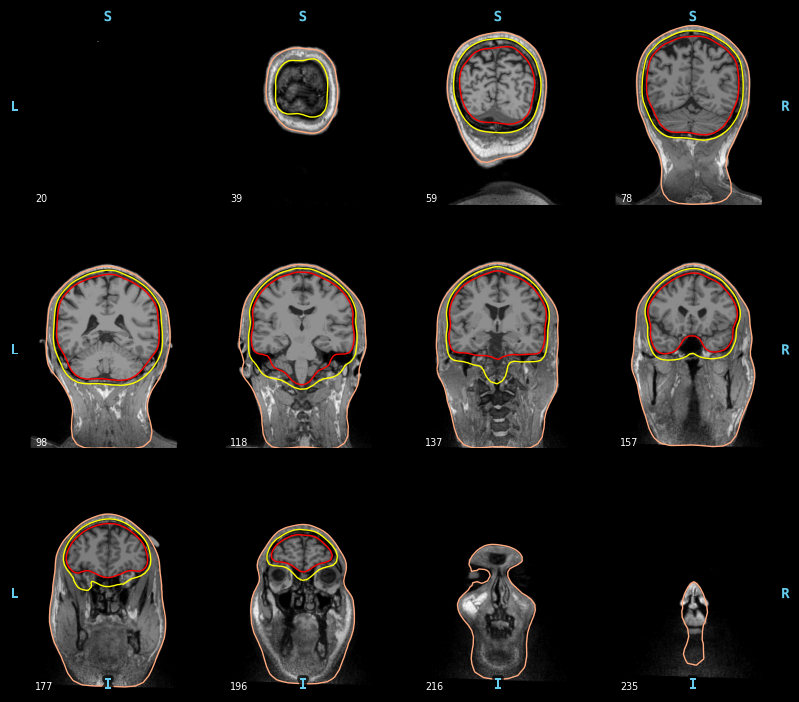

In [19]:
subjects_dir = 'D:/backup/MNE-sample-data/subjects'


mne.viz.plot_bem(subject='sample', 
                 subjects_dir=subjects_dir,
                 orientation='coronal')

In [ ]:
subject = 'sample'
src = mne.setup_source_space(subject=subject,
                             spacing='oct4',  # Use oct6 during an actual analysis!
                             subjects_dir=subjects_dir,
                             add_dist=False)  # Remove this one during an actual analysis!
src

In [34]:

mne.gui.coregistration(subject='sample', subjects_dir=subjects_dir)

In [36]:
conductivity = (0.3,)  # for single layer – used in MEG
# conductivity = (0.3, 0.006, 0.3)  # for three layers – used in EEG
model = mne.make_bem_model(subject=subject, ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
model

NameError: name 'subject' is not defined

In [ ]:
bem_sol = mne.make_bem_solution(model)
bem_sol